In [11]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor





In [12]:
# Cargar el conjunto de datos Bike Sharing
data = pd.read_csv('day.csv')
# Ver las primeras filas del conjunto de datos

data.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,False,1,False,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,False,1,False,0,False,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,False,1,False,1,True,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,False,1,False,2,True,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,False,1,False,3,True,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Definir las variables dependientes e independientes
# En este caso, 'cnt' es la variable objetivo que queremos predecir
X = data[['temp', 'hum', 'windspeed']]  # Usaremos algunas características 
y = data['cnt']



In [14]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Crear el modelo 
# puedes cambiar los modelos unicamente cambiando los comentarios
#model=KNeighborsRegressor(n_neighbors=2)
#model=RandomForestClassifier()
model = XGBRegressor()
#model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2020722.2320442523
R^2 Score: 0.49606445111931274


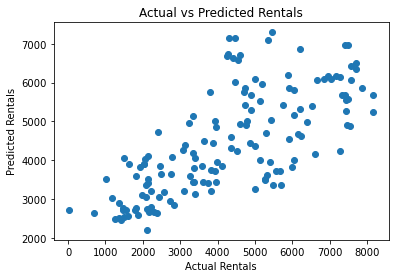

In [17]:

# Visualizar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Rentals")
plt.show()